## Econ 212 Class noteboook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # HP filter and OLS regression
import datetime
from datetime import datetime as dt
import matplotlib.dates as mdates
import importlib
from pandas_datareader.fred import FredReader

In [2]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 2.5

In [3]:
import data_load_212
importlib.reload(data_load_212)

<module 'data_load_212' from '/Users/awellman/Documents/SIEPR/GitHub/macrodata-wellman/Econ212/data_load_212.py'>

Function to take best linear fit, decadal average growth

In [4]:
def reg_fit(Y,X, verbose=False):
    X = sm.add_constant(X)
    model=sm.OLS(Y,X)
    results = model.fit()
    if verbose:
        print(results.summary())
    return results.predict(), results.params

def decadal_average_growth(ser, dec=False):
    if dec:
        # Actual decadal growh
        t=ser.loc['1950-03-31':'1959-12-31']
        nq=t.index.size
        print('Average for 1950s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1960-03-31':'1969-12-31']
        nq=t.index.size
        print('Average for 1960s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1970-03-31':'1979-12-31']
        nq=t.index.size
        print('Average for 1970s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1980-03-31':'1989-12-31']
        nq=t.index.size
        print('Average for 1980s :', round(np.log(t[-1]/t[0])/(nq/4),4))  

        t=ser.loc['1990-03-31':'1999-12-31']
        nq=t.index.size
        print('Average for 1990s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2000-03-31':'2009-12-31']
        nq=t.index.size
        print('Average for 2000s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2010-03-31':'2019-12-31']
        nq=t.index.size
        print('Average for 2010s :', round(np.log(t[-1]/t[0])/(nq/4),4))
    else:
        # 20-year growth
        t=ser.loc['1950-03-31':'1969-12-31']
        nq=t.index.size
        print('Average for 1950/60 :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1970-03-31':'1999-12-31']
        nq=t.index.size
        print('Average for 1970/80 :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2000-03-31':'2019-12-31']
        nq=t.index.size
        print('Average for 2000/10 :', round(np.log(t[-1]/t[0])/(nq/4),4))


# Quarterly data

Load data, can use either `same_def` or `own_def` for own deflator

In [5]:
series = data_load_212.get_fred_data('Q','own_def')

In [6]:
stateu = data_load_212.get_state_u_data('Q')

#### Sample selection

In [7]:
capital=FredReader('RKNANPUSA666NRUG', start='1947').read()

In [8]:
series = series.loc['1954-12-31':dt.now().strftime('%Y-%m-%d')]
series.tail()

,yn,cn,gn,nxn,impn,expn,y,c,g,i,...,dur,invest,govexpen,solow,thours,employment,mrwage,capitalu,hpworker,gdpcapita
date,,,,,,,,,,,,,,,,,,,,,
2022-12-31,26408.405,17917.039,4572.408,-877.204,3891.004,3013.800,21989.981,15171.391,3714.800,4058.491,...,2129.012,4796.162,9175.833,1.016796,259928.0,71.398340,363.0,79.939933,33.900000,65783.0
2023-03-31,26813.601,18269.569,4643.890,-825.687,3890.491,3064.804,22112.329,15312.850,3758.768,3963.689,...,2194.859,4725.828,9326.383,1.016796,259928.0,71.781567,363.0,79.564867,33.966667,66078.0
2023-06-30,27063.012,18419.007,4669.808,-806.093,3767.851,2961.759,22225.350,15343.553,3789.786,4014.121,...,2193.586,4780.290,9422.404,1.016796,259928.0,71.969496,365.0,79.413500,33.800000,66341.0
2023-09-30,27610.128,18679.496,4794.830,-779.231,3809.982,3030.751,22490.692,15461.382,3843.355,4111.053,...,2204.485,4915.033,10007.677,1.016796,259928.0,72.021024,365.0,79.492900,33.800000,67036.0
2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.016796,259928.0,71.979163,NaN,78.731850,33.766667,NaN


In [9]:
NQ=series.index.size # Number of quarters in data
series['ypop']=series['y']/series['pop'] # Output per person
series['t']=np.arange(0,NQ) # time

In [10]:
# Drop the last entry from the DataFrame
series = series.drop(series.tail(1).index)  # This removes the last row

In [11]:
series

,yn,cn,gn,nxn,impn,expn,y,c,g,i,...,govexpen,solow,thours,employment,mrwage,capitalu,hpworker,gdpcapita,ypop,t
date,,,,,,,,,,,,,,,,,,,,,
1954-12-31,399.734,245.093,91.356,1.145,15.460,16.605,2936.852,1761.703,1049.200,295.882,...,NaN,0.667260,110356.50,NaN,NaN,NaN,NaN,17960.0,0.017897,0
1955-03-31,413.073,251.398,91.869,1.104,16.169,17.273,3020.746,1801.231,1049.830,325.442,...,NaN,0.672531,111238.00,NaN,NaN,NaN,NaN,18396.0,0.018329,1
1955-06-30,421.532,256.466,92.533,-0.155,17.097,16.942,3069.910,1835.737,1039.546,345.235,...,NaN,0.671574,111837.75,NaN,NaN,NaN,NaN,18621.0,0.018553,2
1955-09-30,430.221,260.651,94.099,0.724,17.421,18.145,3111.379,1858.411,1046.213,350.533,...,NaN,0.670617,112437.50,NaN,NaN,NaN,NaN,18787.0,0.018721,3
1955-12-31,437.092,264.639,93.331,0.240,18.109,18.349,3130.068,1881.748,1025.470,358.661,...,NaN,0.669661,113037.25,NaN,NaN,NaN,NaN,18808.0,0.018741,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,25994.639,17684.189,4477.855,-892.026,3976.524,3084.498,21851.134,15127.399,3666.982,4024.750,...,8894.032,1.016796,259928.00,71.395872,362.0,80.760167,34.000000,65462.0,0.065485,271
2022-12-31,26408.405,17917.039,4572.408,-877.204,3891.004,3013.800,21989.981,15171.391,3714.800,4058.491,...,9175.833,1.016796,259928.00,71.398340,363.0,79.939933,33.900000,65783.0,0.065811,272
2023-03-31,26813.601,18269.569,4643.890,-825.687,3890.491,3064.804,22112.329,15312.850,3758.768,3963.689,...,9326.383,1.016796,259928.00,71.781567,363.0,79.564867,33.966667,66078.0,0.066108,273


## Begin Graphs

## GDP per Person vs a linear trend (Figure 1 Lecture 1)

In [12]:
series['ypoplogfit'], regparams=reg_fit(np.log(series['ypop']), series['t'], verbose=False)
series['ylogfit'], regparams=reg_fit(np.log(series['y']), series['t'], verbose=False)

Text(0.5, 1.0, 'U.S. real GDP Per Person ($Y_t/pop_t$)')

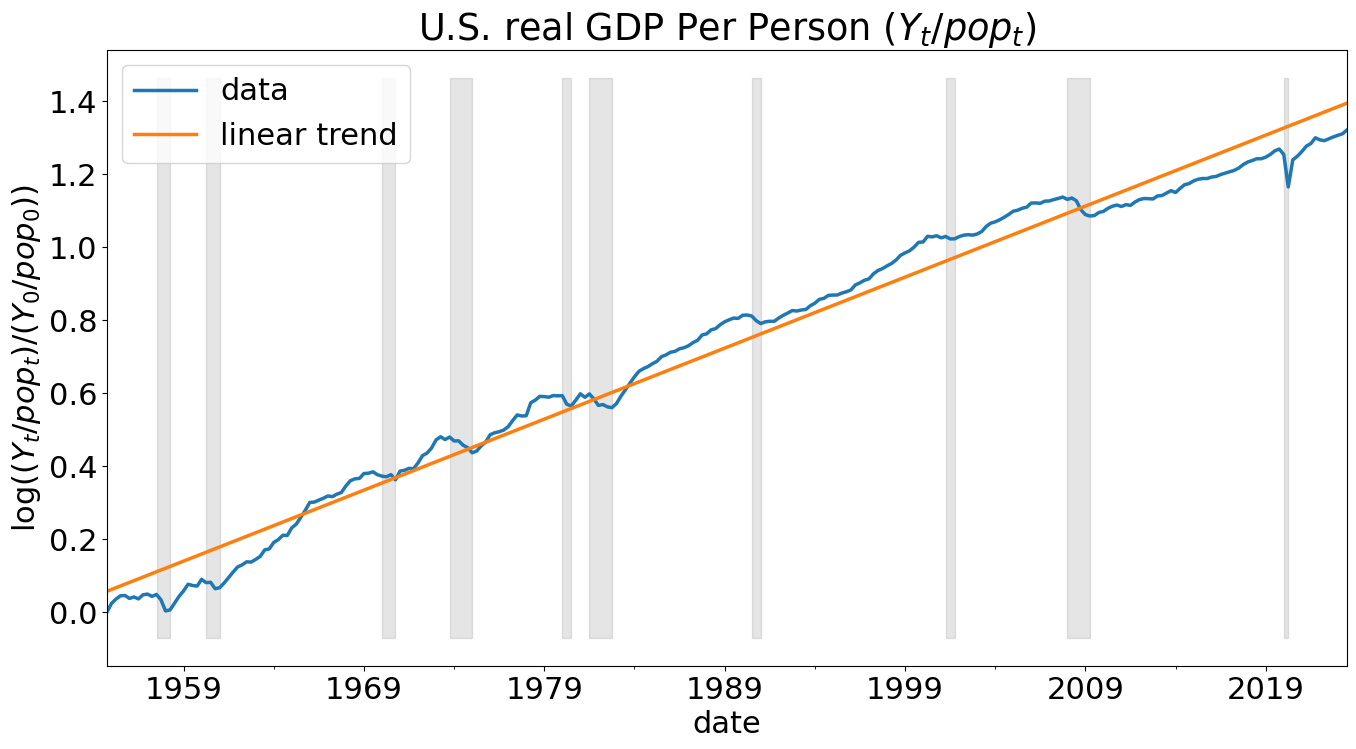

In [13]:
(np.log(series['ypop'])-np.log(series['ypop'][0])).plot(label='data')
(series['ypoplogfit']-np.log(series['ypop'][0])).plot(label='linear trend')
yl, yh = plt.ylim()
plt.legend()
plt.ylabel(r'$\log((Y_t/pop_t)/(Y_0/pop_0))$')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('U.S. real GDP Per Person ($Y_t/pop_t$)')

## Taking Out the Trend: The HP Filter (Lecture 1 Figure 2)

In [14]:
#cycle_ypop, trend_ypop=sm.tsa.filters.hpfilter(np.log(series['ypop']),100000000000)
#lambdahp=100000000000
lambdahp=1600
cycle_y, trend_y=sm.tsa.filters.hpfilter(np.log(series['y']),lambdahp)
cycle_ypop, trend_ypop=sm.tsa.filters.hpfilter(np.log(series['ypop']),lambdahp)
#trend_bk.plot()

Text(0.5, 1.0, 'US Log Real GDP Per Person')

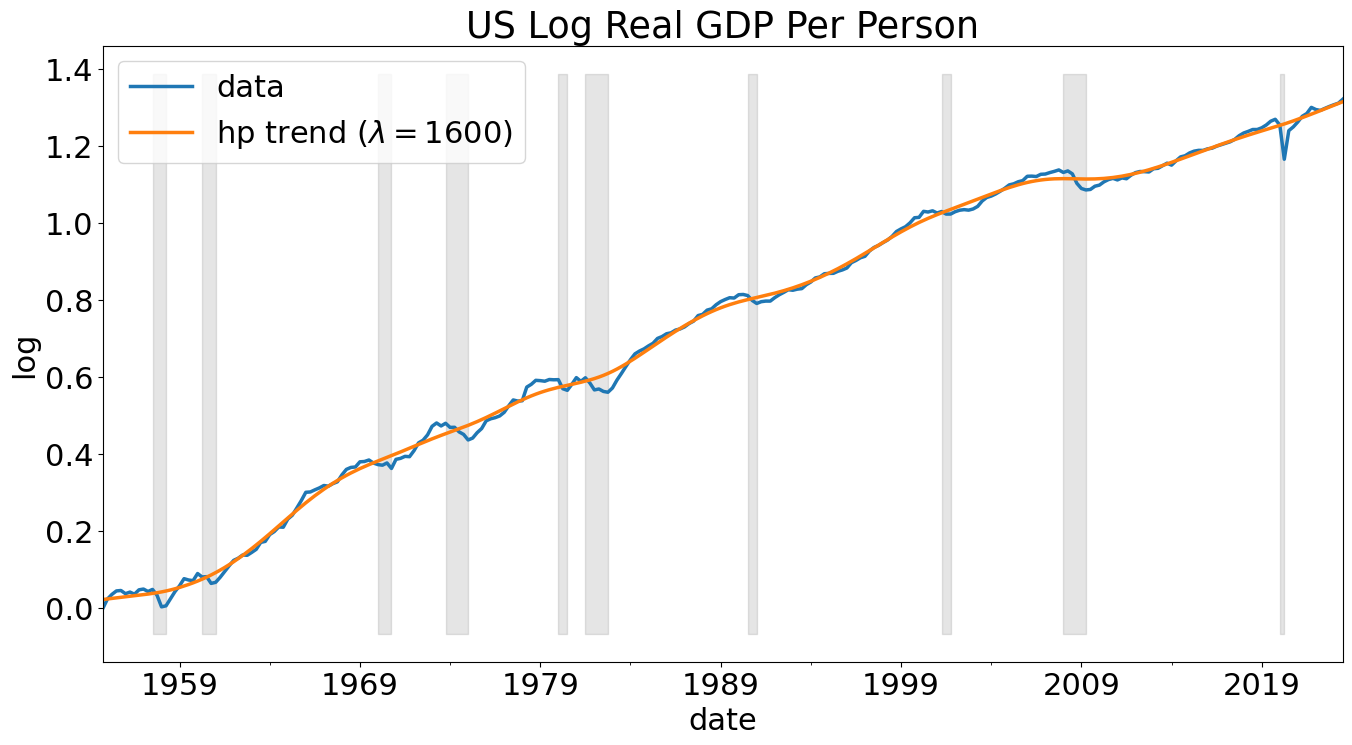

In [15]:
(np.log(series['ypop'])-np.log(series['ypop'][0])).plot(label='data')
(trend_ypop-np.log(series['ypop'][0])).plot(label=r'hp trend ($\lambda=1600$)')
yl, yh = plt.ylim()
plt.ylabel('log')
plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('US Log Real GDP Per Person')
# plt.savefig(f'Export/us_log_realgdp_hptrend.pdf', format='pdf', transparent=True);

## US output: detrending matters, Business cycles more severe & persistent... (Lecture 1 Figure 3)

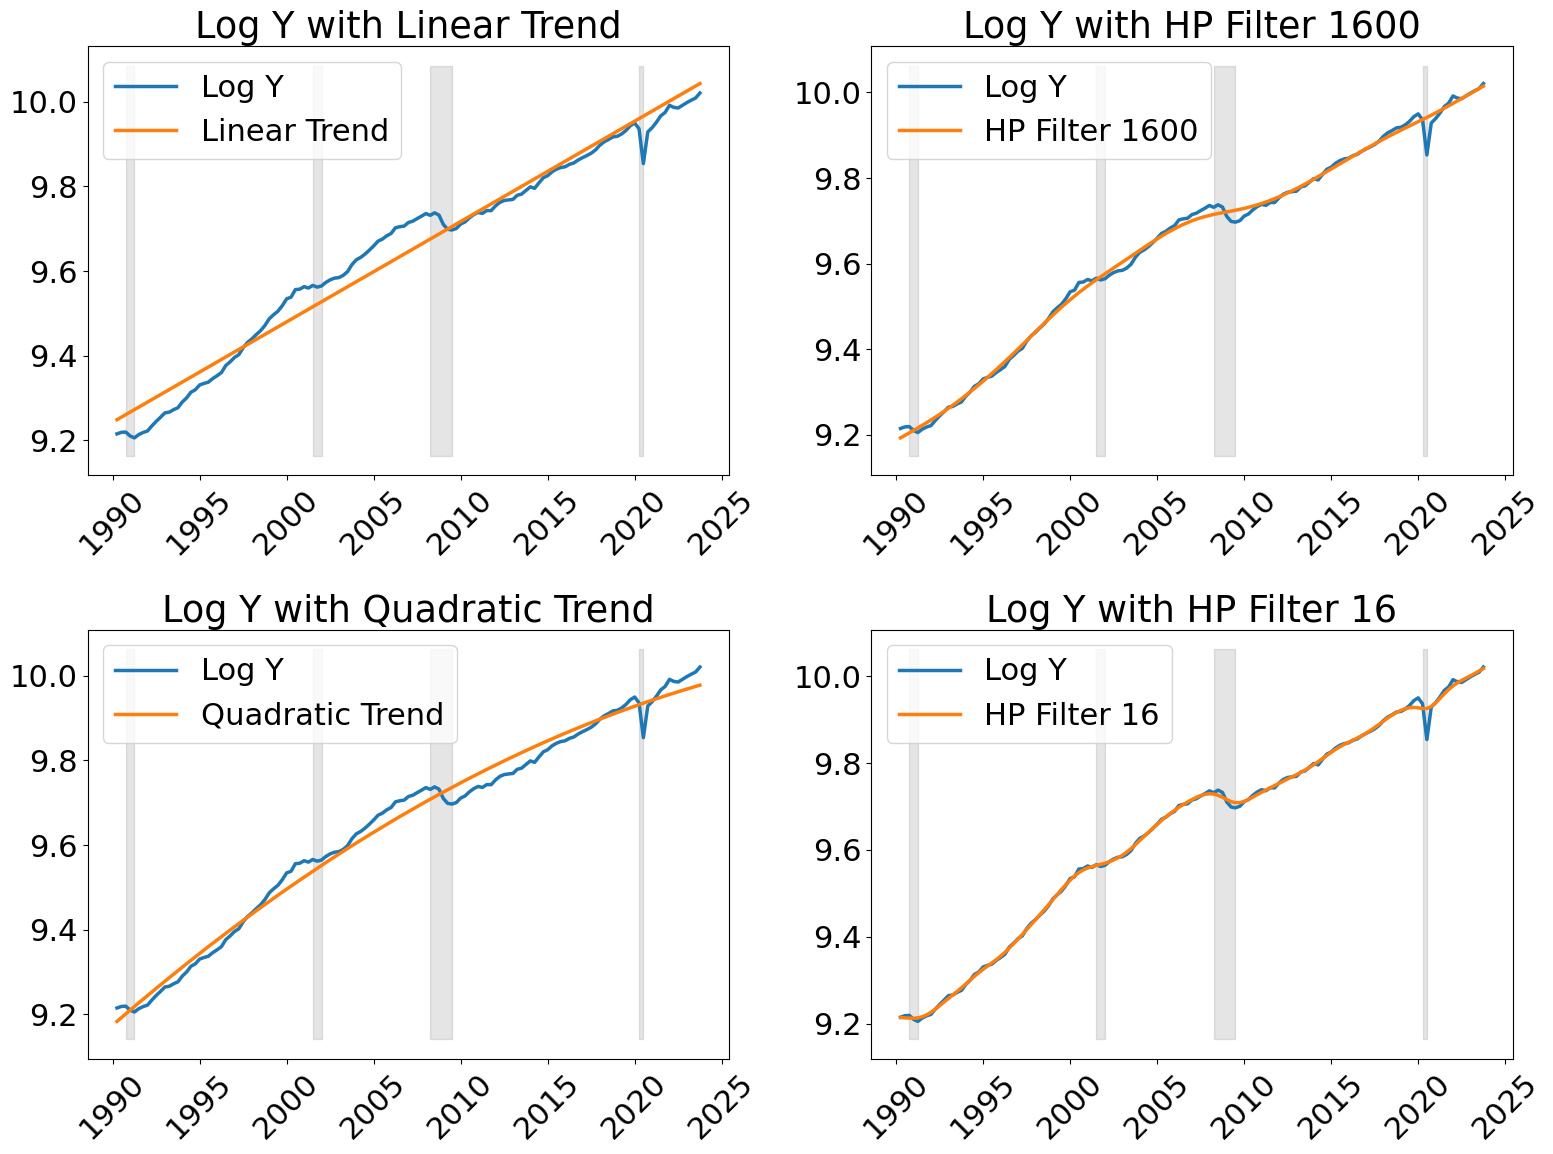

In [16]:
# Filter the DataFrame to start from 1990 and make a copy to avoid SettingWithCopyWarning
series2 = series[series.index >= '1990-01-01'].copy()

# Recalculate 't' since we are starting from 1990 now
series2['t'] = np.arange(len(series2)) # Time index

# Log of GDP
series2['ylog'] = np.log(series2['y'])

# Linear Trend
series2['ypoplogfit'], regparams = reg_fit(series2['ylog'], series2['t'], verbose=False)

# HP Filters
lambdahp_1600 = 1600
lambdahp_16 = 16
cycle_y_1600, trend_y_1600 = sm.tsa.filters.hpfilter(series2['ylog'], lambdahp_1600)
cycle_y_16, trend_y_16 = sm.tsa.filters.hpfilter(series2['ylog'], lambdahp_16)

# Quadratic Trend
series2['t_sq'] = series2['t'] ** 2
X_quad = sm.add_constant(series2[['t', 't_sq']])
model_quad = sm.OLS(series2['ylog'], X_quad)
results_quad = model_quad.fit()
quad_fit = results_quad.predict(X_quad)

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12)) # 2x2 subplots

# Top-Left: Linear Trend
axs[0, 0].plot(series2.index, series2['ylog'], label='Log Y')
axs[0, 0].plot(series2.index, series2['ypoplogfit'], label='Linear Trend')
axs[0, 0].set_title('Log Y with Linear Trend')
axs[0, 0].legend()

# Top-Right: HP Filter 1600
axs[0, 1].plot(series2.index, series2['ylog'], label='Log Y')
axs[0, 1].plot(series2.index, trend_y_1600, label='HP Filter 1600')
axs[0, 1].set_title('Log Y with HP Filter 1600')
axs[0, 1].legend()

# Bottom-Left: Quadratic Trend
axs[1, 0].plot(series2.index, series2['ylog'], label='Log Y')
axs[1, 0].plot(series2.index, quad_fit, label='Quadratic Trend')
axs[1, 0].set_title('Log Y with Quadratic Trend')
axs[1, 0].legend()

# Bottom-Right: HP Filter 16
axs[1, 1].plot(series2.index, series2['ylog'], label='Log Y')
axs[1, 1].plot(series2.index, trend_y_16, label='HP Filter 16')
axs[1, 1].set_title('Log Y with HP Filter 16')
axs[1, 1].legend()

# Adding recession shades to all subplots
for ax in axs.flat:
    ax.fill_between(series2.index, *ax.get_ylim(), where=series2['USREC'].values, color='k', alpha=0.1)

for ax in axs.flat:
    ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Show year label every 5 years
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format to display only the year
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)  # Rotate labels to avoid overlap


plt.tight_layout()
plt.show()

## US output: detrending matters (Lecture 1 Figure 4)

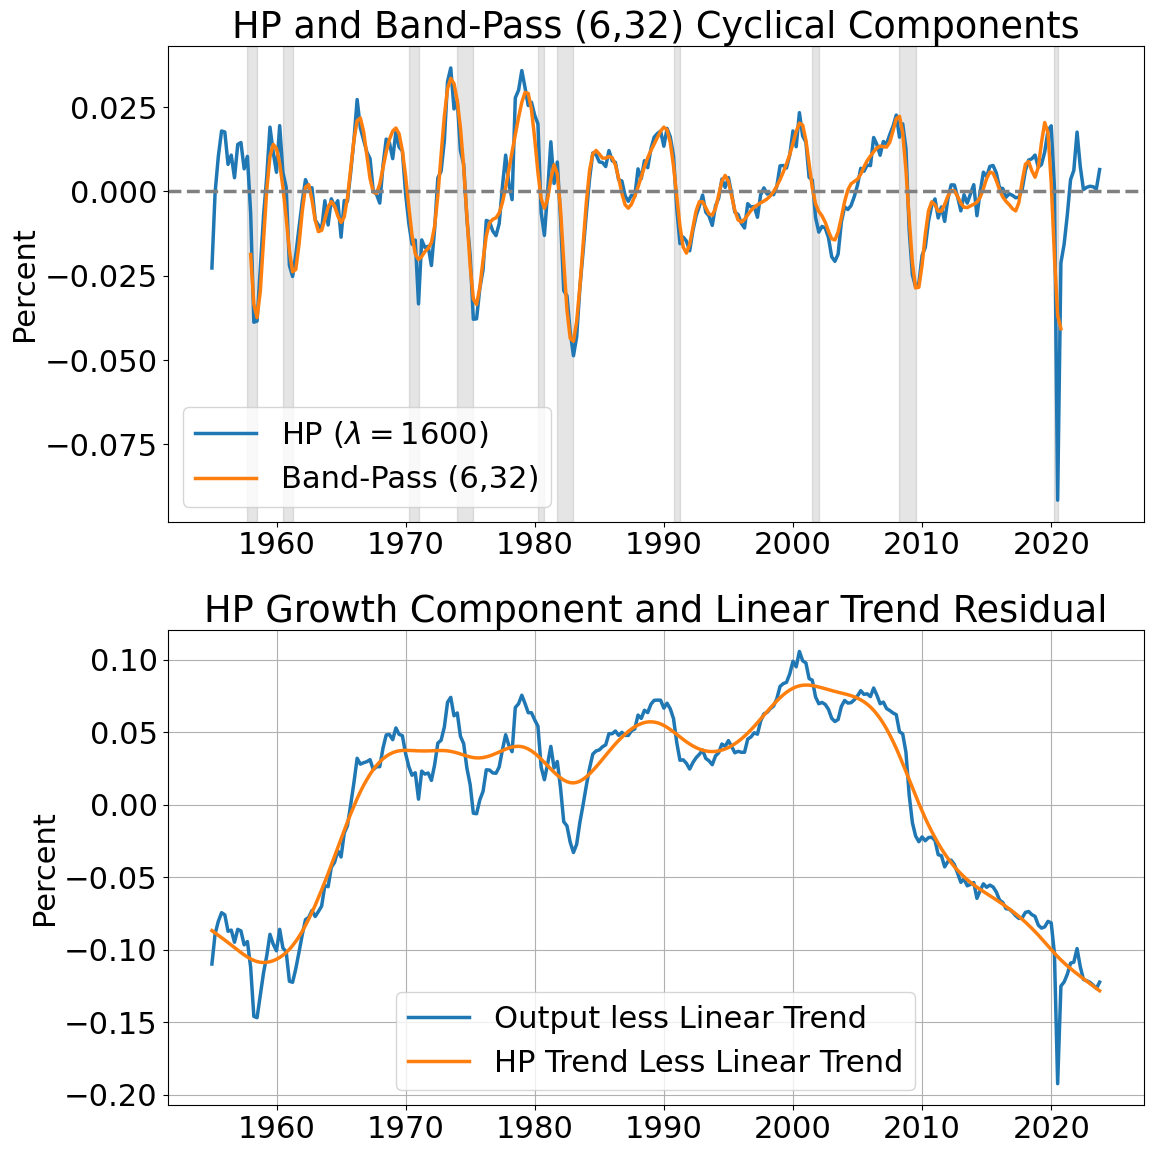

In [17]:
# First graph data preparation
cycle_ypop, trend_ypop = sm.tsa.filters.hpfilter(np.log(series['ypop']), lambdahp)
cycle_ypop_bp = sm.tsa.filters.bkfilter(np.log(series['ypop']), low=6, high=32, K=12)

# Second graph data preparation
output_less_linear_trend = (np.log(series['y']) - series['ylogfit'])
cycle_y_1600, trend_y_1600 = sm.tsa.filters.hpfilter(np.log(series['y']), lambdahp)
hp_trend_less_linear_trend = (trend_y_1600 - series['ylogfit'])

# Creating subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plotting the first graph
axs[0].plot(cycle_ypop, label=r'HP ($\lambda=1600$)')
axs[0].plot(cycle_ypop_bp, label='Band-Pass (6,32)')
yl, yh = axs[0].set_ylim()
axs[0].set_ylabel('Percent')
axs[0].legend()
axs[0].fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
axs[0].set_title('HP and Band-Pass (6,32) Cyclical Components')
axs[0].axhline(y=0, color='gray', linestyle='--')

# Plotting the second graph
axs[1].plot(series.index, output_less_linear_trend, label="Output less Linear Trend")
axs[1].plot(series.index, hp_trend_less_linear_trend, label="HP Trend Less Linear Trend")
axs[1].set_ylabel('Percent')
axs[1].set_title('HP Growth Component and Linear Trend Residual')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## (1) ND consumption less volatile, D consumption more volatile, highly correlated (Lecture 1 Figure 5)

/Users/awellman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


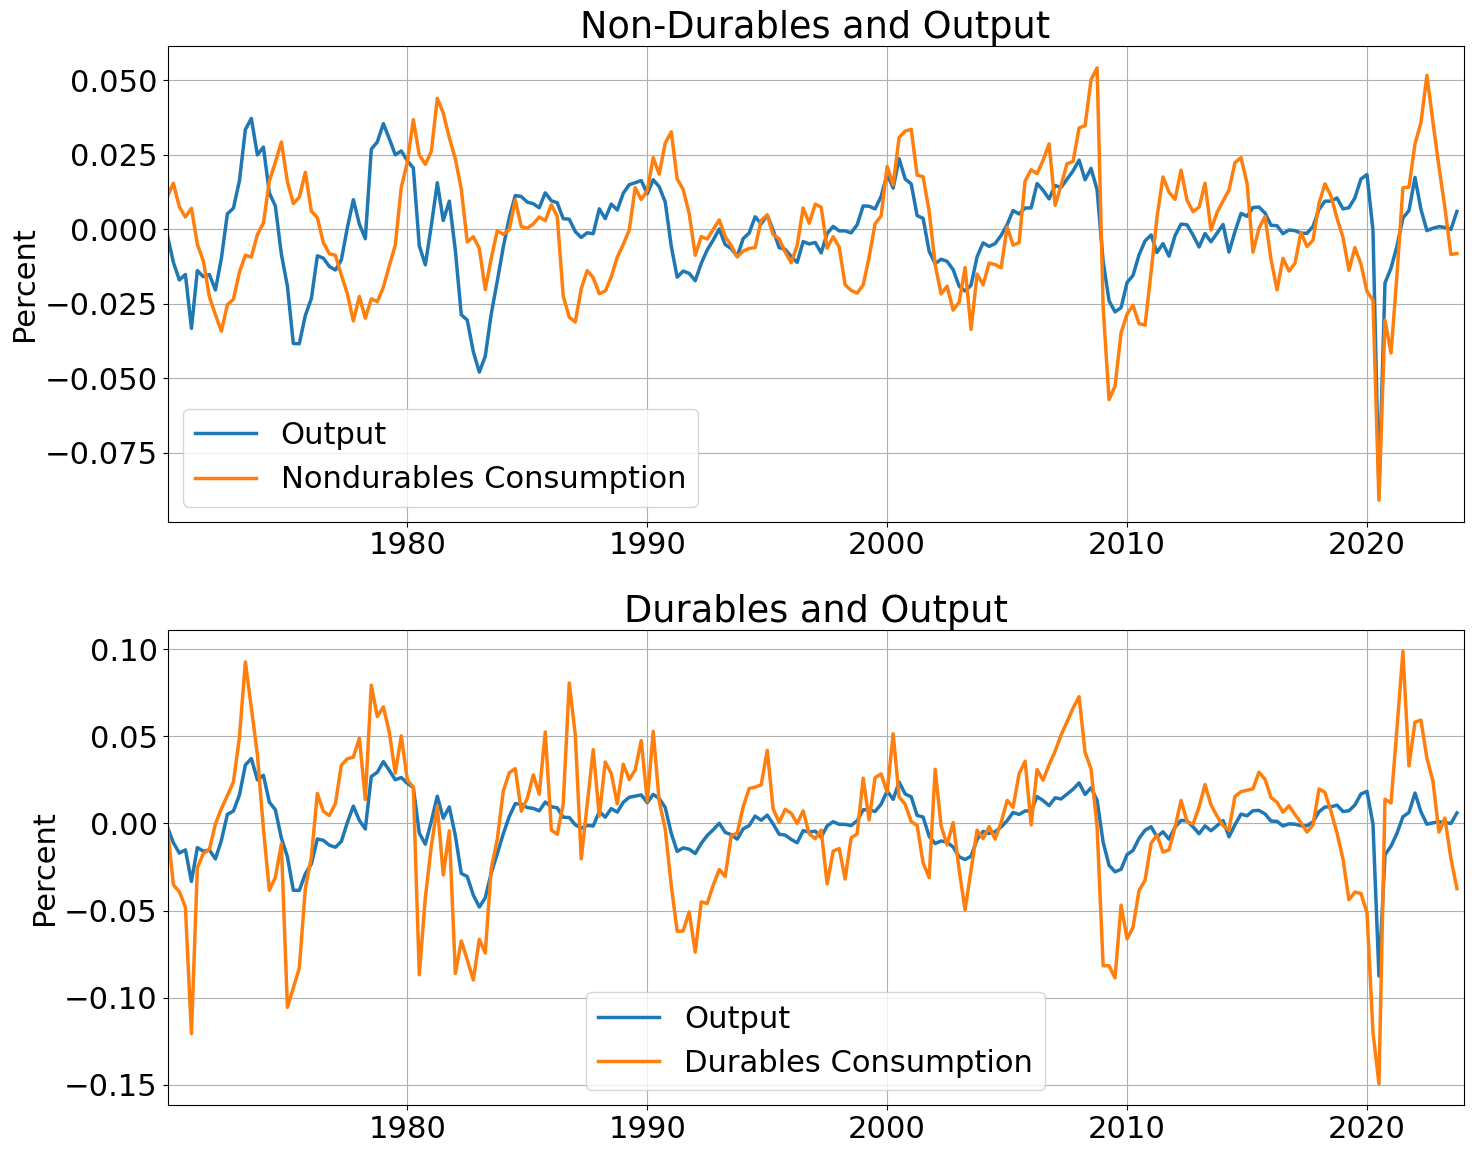

In [18]:
# Step 1: Prepare the Data
# Drop all NaN values from 'nondur' and 'dur'
cleaned_nondur = series['nondur'].dropna()
cleaned_dur = series['dur'].dropna()

# Drop all NaN values from 'y' (GDP) and ensure it has the same indices as the cleaned data
cleaned_y = series['y'].dropna()

# Step 2: Apply the HP Filter
# Apply the HP filter to the cleaned series
cycle_nondur, trend_nondur = sm.tsa.filters.hpfilter(np.log(cleaned_nondur), lambdahp_1600)
cycle_dur, trend_dur = sm.tsa.filters.hpfilter(np.log(cleaned_dur), lambdahp_1600)

# Apply the HP filter to 'y' for each corresponding cleaned series and align indices
cycle_y_nondur, trend_y_nondur = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_nondur.index)), lambdahp_1600)
cycle_y_dur, trend_y_dur = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_dur.index)), lambdahp_1600)

# Define the x-axis range from 1970 to present and major ticks from 1980
x_range = [pd.to_datetime('1970-01-01'), pd.to_datetime('now')]
start_year = 1980
end_year = pd.to_datetime('now').year
major_ticks = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='10YS')
year_formatter = mdates.DateFormatter('%Y')

# Step 3: Plot the Data
# Creating 2x1 subplots with increased width
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plotting Non-Durables on the first subplot
axes[0].plot(cleaned_nondur.index, cycle_y_nondur, label='Output')
axes[0].plot(cleaned_nondur.index, cycle_nondur, label='Nondurables Consumption')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_title('Non-Durables and Output')
axes[0].set_xlim(x_range)  # Set the x-axis (time) limits
axes[0].set_xticks(major_ticks)  # Set the major ticks
axes[0].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year

# Plotting Durables on the second subplot
axes[1].plot(cleaned_dur.index, cycle_y_dur, label='Output')
axes[1].plot(cleaned_dur.index, cycle_dur, label='Durables Consumption')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('Percent')
axes[1].set_title('Durables and Output')
axes[1].set_xlim(x_range)  # Set the x-axis (time) limits
axes[1].set_xticks(major_ticks)  # Set the major ticks
axes[1].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year

# Adjusts the subplots to fit into the figure area.
plt.tight_layout()

# Show the plot
plt.show()

## (2) Investment highly procyclical and Government Spending countercyclical (Lecture 1 Figure 5)

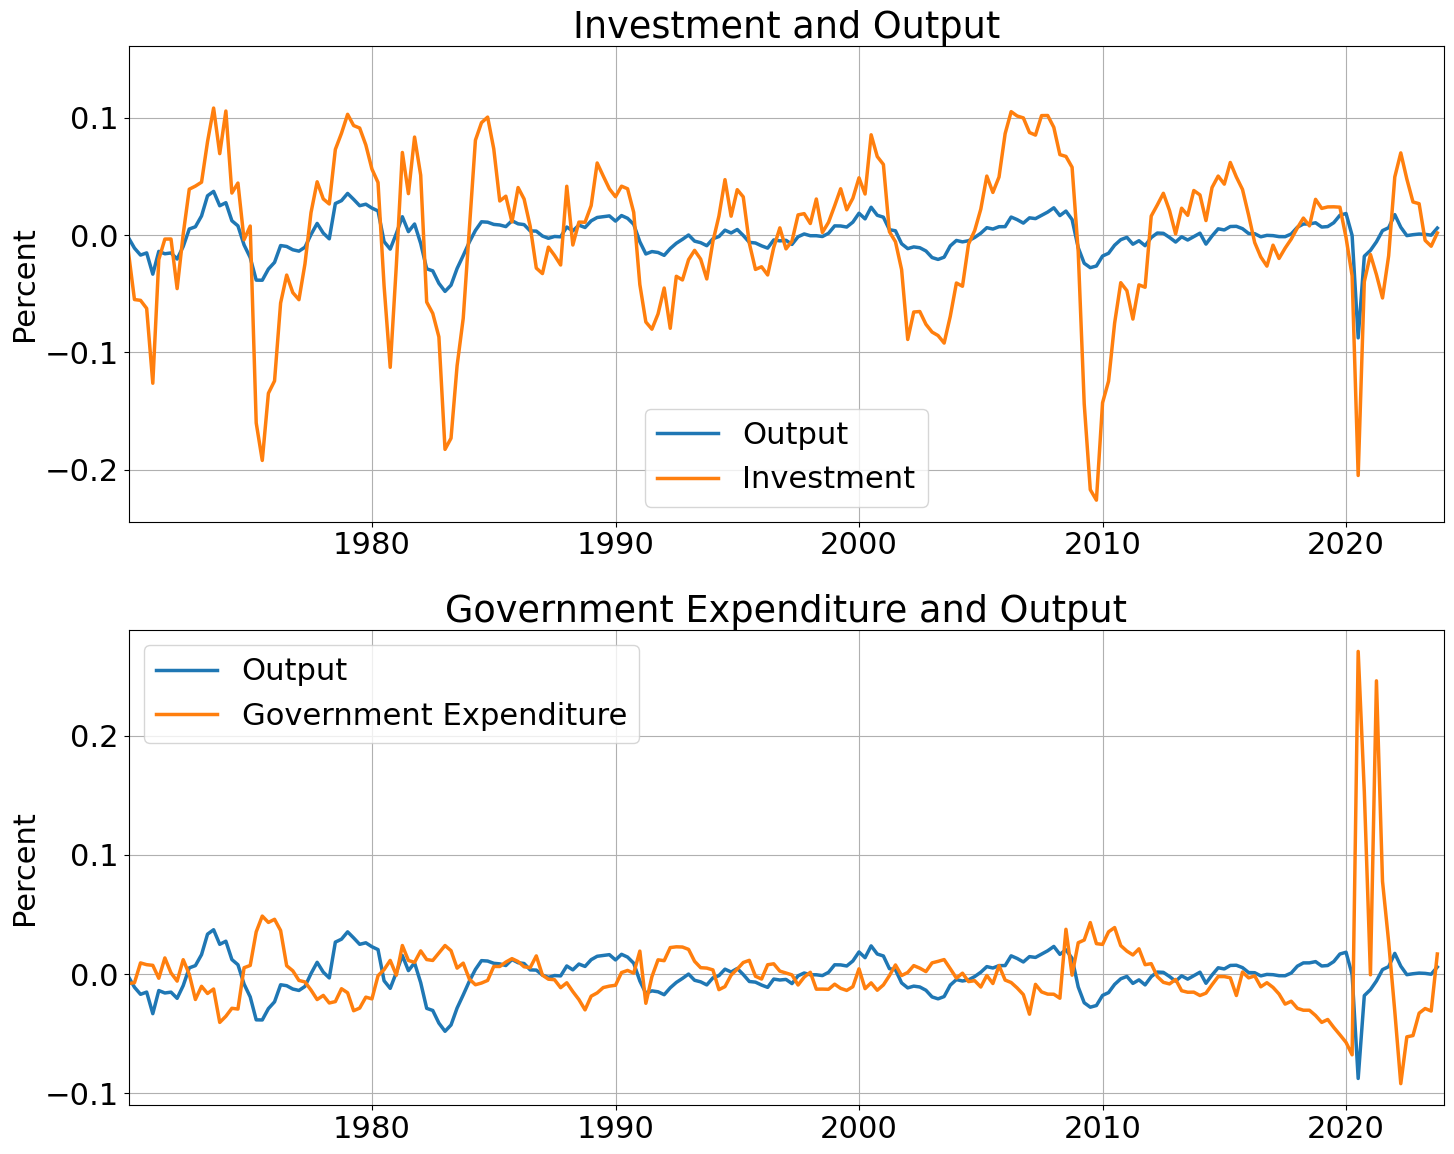

In [19]:
# Drop all NaN values from 'invest' and 'govexpen'
cleaned_invest = series['invest'].dropna()
cleaned_govexpen = series['govexpen'].dropna()

# Drop all NaN values from 'y' (GDP) and ensure it has the same indices as the cleaned data
cleaned_y = series['y'].dropna()

# Step 2: Apply the HP Filter
# Apply the HP filter to the cleaned series
cycle_invest, trend_invest = sm.tsa.filters.hpfilter(np.log(cleaned_invest), lambdahp_1600)
cycle_govexpen, trend_govexpen = sm.tsa.filters.hpfilter(np.log(cleaned_govexpen), lambdahp_1600)

# Apply the HP filter to 'y' for each corresponding cleaned series and align indices
cycle_y_invest, trend_y_invest = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_invest.index)), lambdahp_1600)
cycle_y_govexpen, trend_y_govexpen = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_govexpen.index)), lambdahp_1600)

# Define the x-axis range from 1970 to present and major ticks from 1980
x_range = [pd.to_datetime('1970-01-01'), pd.to_datetime('now')]
start_year = 1980
end_year = pd.to_datetime('now').year
major_ticks = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='10YS')
year_formatter = mdates.DateFormatter('%Y')

# Step 3: Plot the Data
# Creating 2x1 subplots with increased width
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plotting Investment on the first subplot
axes[0].plot(cleaned_invest.index, cycle_y_invest, label='Output')
axes[0].plot(cleaned_invest.index, cycle_invest, label='Investment')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_title('Investment and Output')
axes[0].set_xlim(x_range)  # Set the x-axis (time) limits
axes[0].set_xticks(major_ticks)  # Set the major ticks
axes[0].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year

# Plotting Government Expenditure on the second subplot
axes[1].plot(cleaned_govexpen.index, cycle_y_govexpen, label='Output')
axes[1].plot(cleaned_govexpen.index, cycle_govexpen, label='Government Expenditure')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('Percent')
axes[1].set_title('Government Expenditure and Output')
axes[1].set_xlim(x_range)  # Set the x-axis (time) limits
axes[1].set_xticks(major_ticks)  # Set the major ticks
axes[1].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year

# Adjusts the subplots to fit into the figure area.
plt.tight_layout()

# Show the plot
plt.show()

## (3) Hours track output, capital mildly procyclical (Lecture 1 Figure 6)

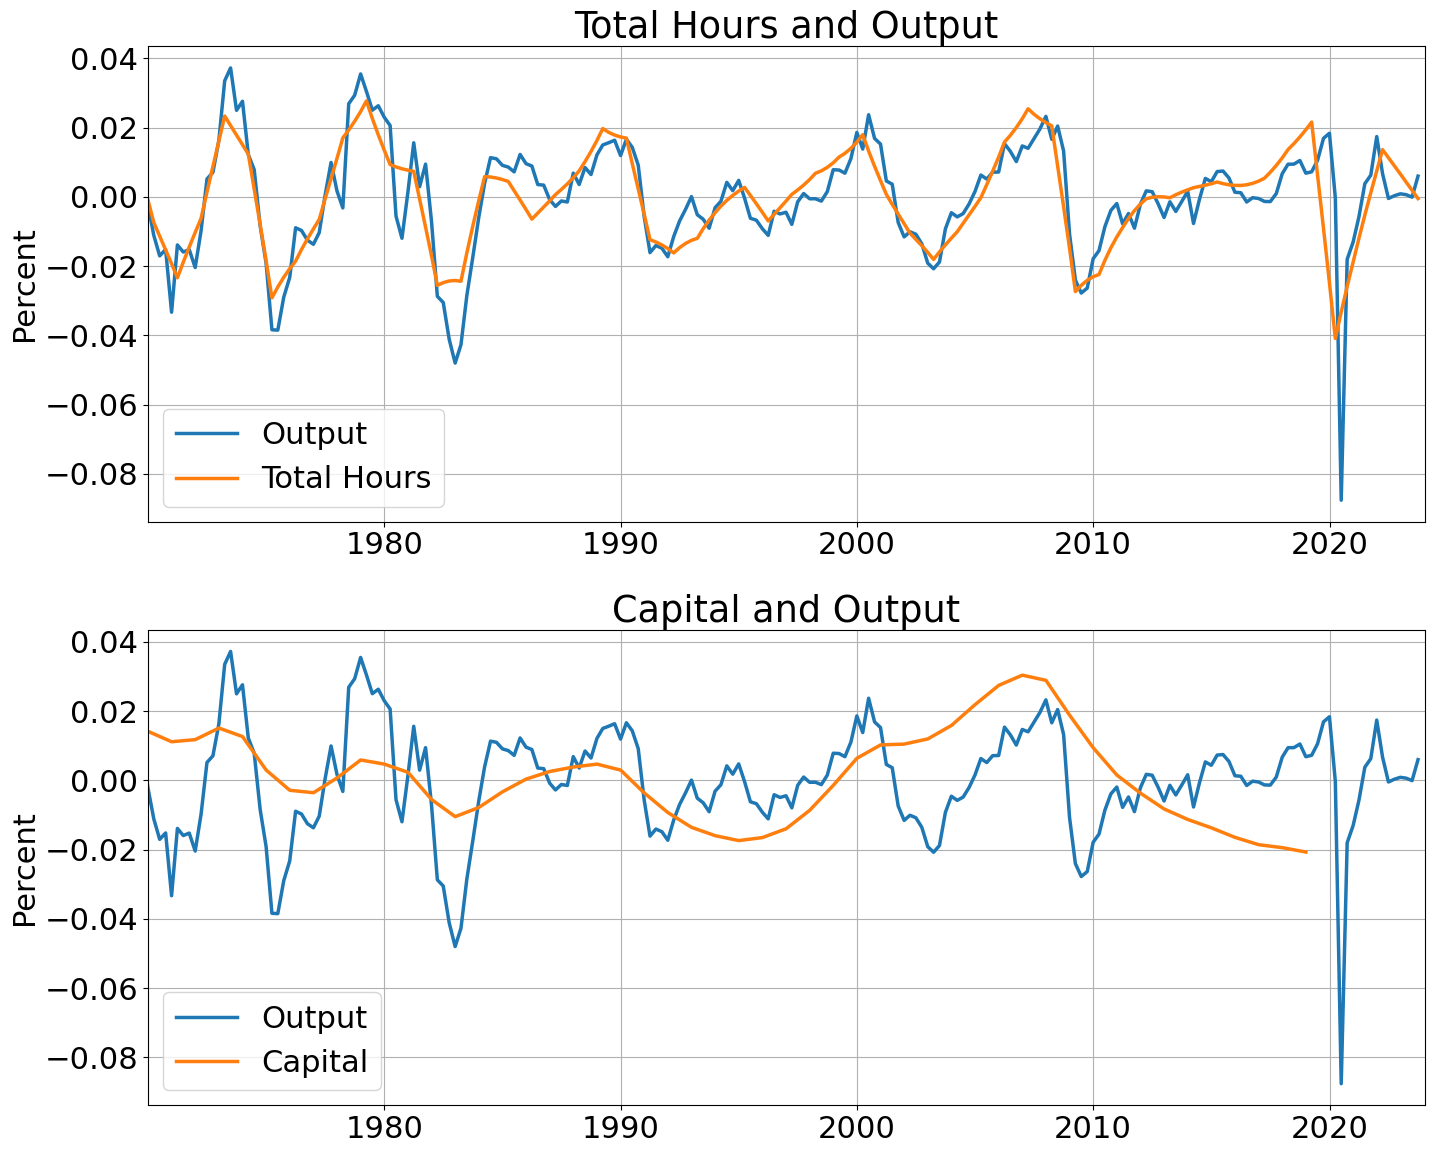

In [20]:
# Drop all NaN values from 'thours' and 'capital'
cleaned_thours = series['thours'].dropna()
cleaned_capital = capital.dropna()  # Assuming 'capital' is a separate dataset or a series

# Drop all NaN values from 'y' (GDP) and ensure it has the same indices as the cleaned data
cleaned_y = series['y'].dropna()

# Step 2: Apply the HP Filter
# Apply the HP filter to the cleaned series
cycle_thours, trend_thours = sm.tsa.filters.hpfilter(np.log(cleaned_thours), lambdahp_1600)
cycle_capital, trend_capital = sm.tsa.filters.hpfilter(np.log(cleaned_capital), lambdahp_1600)

# Apply the HP filter to 'y' for each corresponding cleaned series and align indices
cycle_y_thours, trend_y_thours = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_thours.index)), lambdahp_1600)
cycle_y_capital, trend_y_capital = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_capital.index)), lambdahp_1600)

# Define the x-axis range from 1970 to present and major ticks from 1980
x_range = [pd.to_datetime('1970-01-01'), pd.to_datetime('now')]
start_year = 1980
end_year = pd.to_datetime('now').year
major_ticks = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='10YS')
year_formatter = mdates.DateFormatter('%Y')

# Step 3: Plot the Data
# Creating 2x1 subplots with increased width
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plotting Total Hours on the first subplot
axes[0].plot(cleaned_thours.index, cycle_y_thours, label='Output')
axes[0].plot(cleaned_thours.index, cycle_thours, label='Total Hours')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_title('Total Hours and Output')
axes[0].set_xlim(x_range)  # Set the x-axis (time) limits
axes[0].set_xticks(major_ticks)  # Set the major ticks
axes[0].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year

# Plotting Capital on the second subplot
axes[1].plot(cleaned_thours.index, cycle_y_thours, label='Output')
axes[1].plot(cleaned_capital.index, cycle_capital, label='Capital')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('Percent')
axes[1].set_title('Capital and Output')
axes[1].set_xlim(x_range)  # Set the x-axis (time) limits
axes[1].set_xticks(major_ticks)  # Set the major ticks
axes[1].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year

# Adjusts the subplots to fit into the figure area.
plt.tight_layout()

# Show the plot
plt.show()

## (4) Utilization strongly procyclical, Solow residual procyclical (Lecture 1 Figure 7)

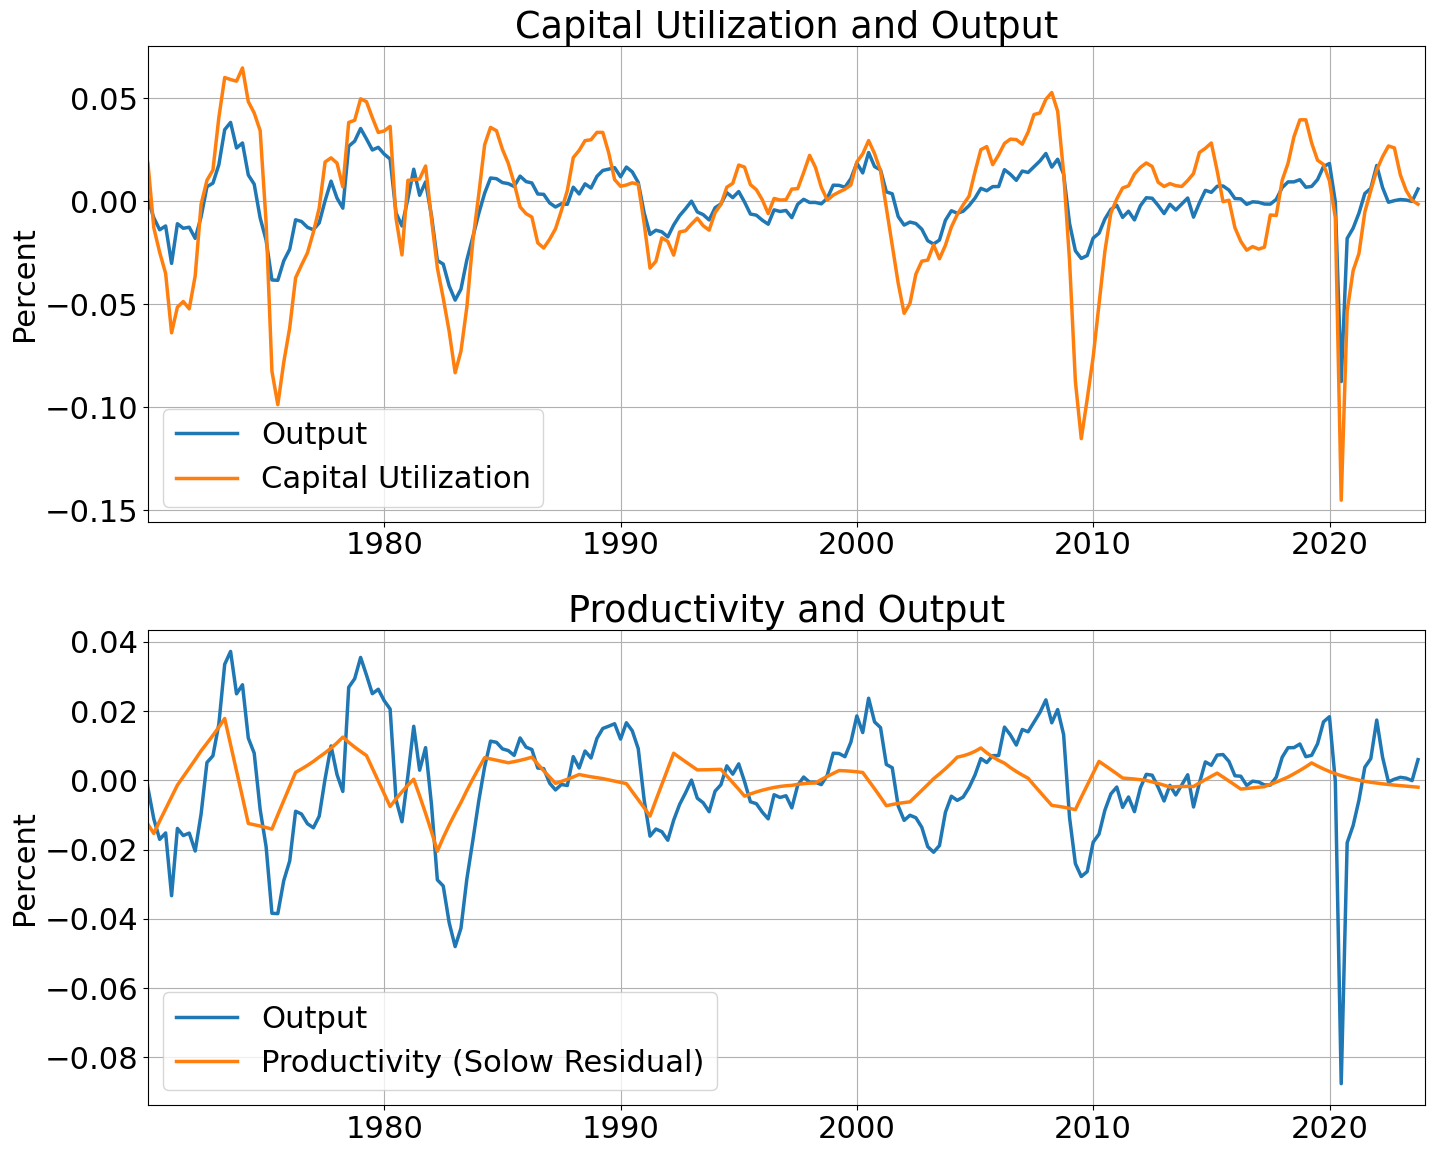

In [21]:
# Drop all NaN values from 'capitalu' and 'solow'
cleaned_capitalu = series['capitalu'].dropna()
cleaned_solow = series['solow'].dropna()

# Drop all NaN values from 'y' (GDP) and ensure it has the same indices as the cleaned data
cleaned_y = series['y'].dropna()

# Step 2: Apply the HP Filter
# Apply the HP filter to the cleaned series
cycle_capitalu, trend_capitalu = sm.tsa.filters.hpfilter(np.log(cleaned_capitalu), lambdahp_1600)
cycle_solow, trend_solow = sm.tsa.filters.hpfilter(np.log(cleaned_solow), lambdahp_1600)

# Apply the HP filter to 'y' for each corresponding cleaned series and align indices
cycle_y_capitalu, trend_y_capitalu = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_capitalu.index)), lambdahp_1600)
cycle_y_solow, trend_y_solow = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_solow.index)), lambdahp_1600)

# Step 3: Plot the Data
# Creating 2x1 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Define the x-axis range from 1970 to present
x_range = [pd.to_datetime('1970-01-01'), pd.to_datetime('now')]

# Define x-axis major ticks to start from 1980
start_year = 1980
end_year = pd.to_datetime('now').year
major_ticks = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='10YS')

# Define date formatter to only show the year part
year_formatter = mdates.DateFormatter('%Y')

# Plotting Capital Utilization on the first subplot
axes[0].plot(cleaned_capitalu.index, cycle_y_capitalu, label='Output')
axes[0].plot(cleaned_capitalu.index, cycle_capitalu, label='Capital Utilization')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_title('Capital Utilization and Output')
axes[0].set_xlim(x_range)  # Set the x-axis (time) limits
axes[0].set_xticks(major_ticks)  # Set the major ticks
axes[0].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year

# Plotting Productivity on the second subplot
axes[1].plot(cleaned_solow.index, cycle_y_solow, label='Output')
axes[1].plot(cleaned_solow.index, cycle_solow, label='Productivity (Solow Residual)')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('Percent')
axes[1].set_title('Productivity and Output')
axes[1].set_xlim(x_range)  # Set the x-axis (time) limits
axes[1].set_xticks(major_ticks)  # Set the major ticks
axes[1].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year

# Adjusts the subplots to fit into the figure area.
plt.tight_layout()

# Show the plot
plt.show()
plt.show()

## (5) Employment more procyclical than hours per worker

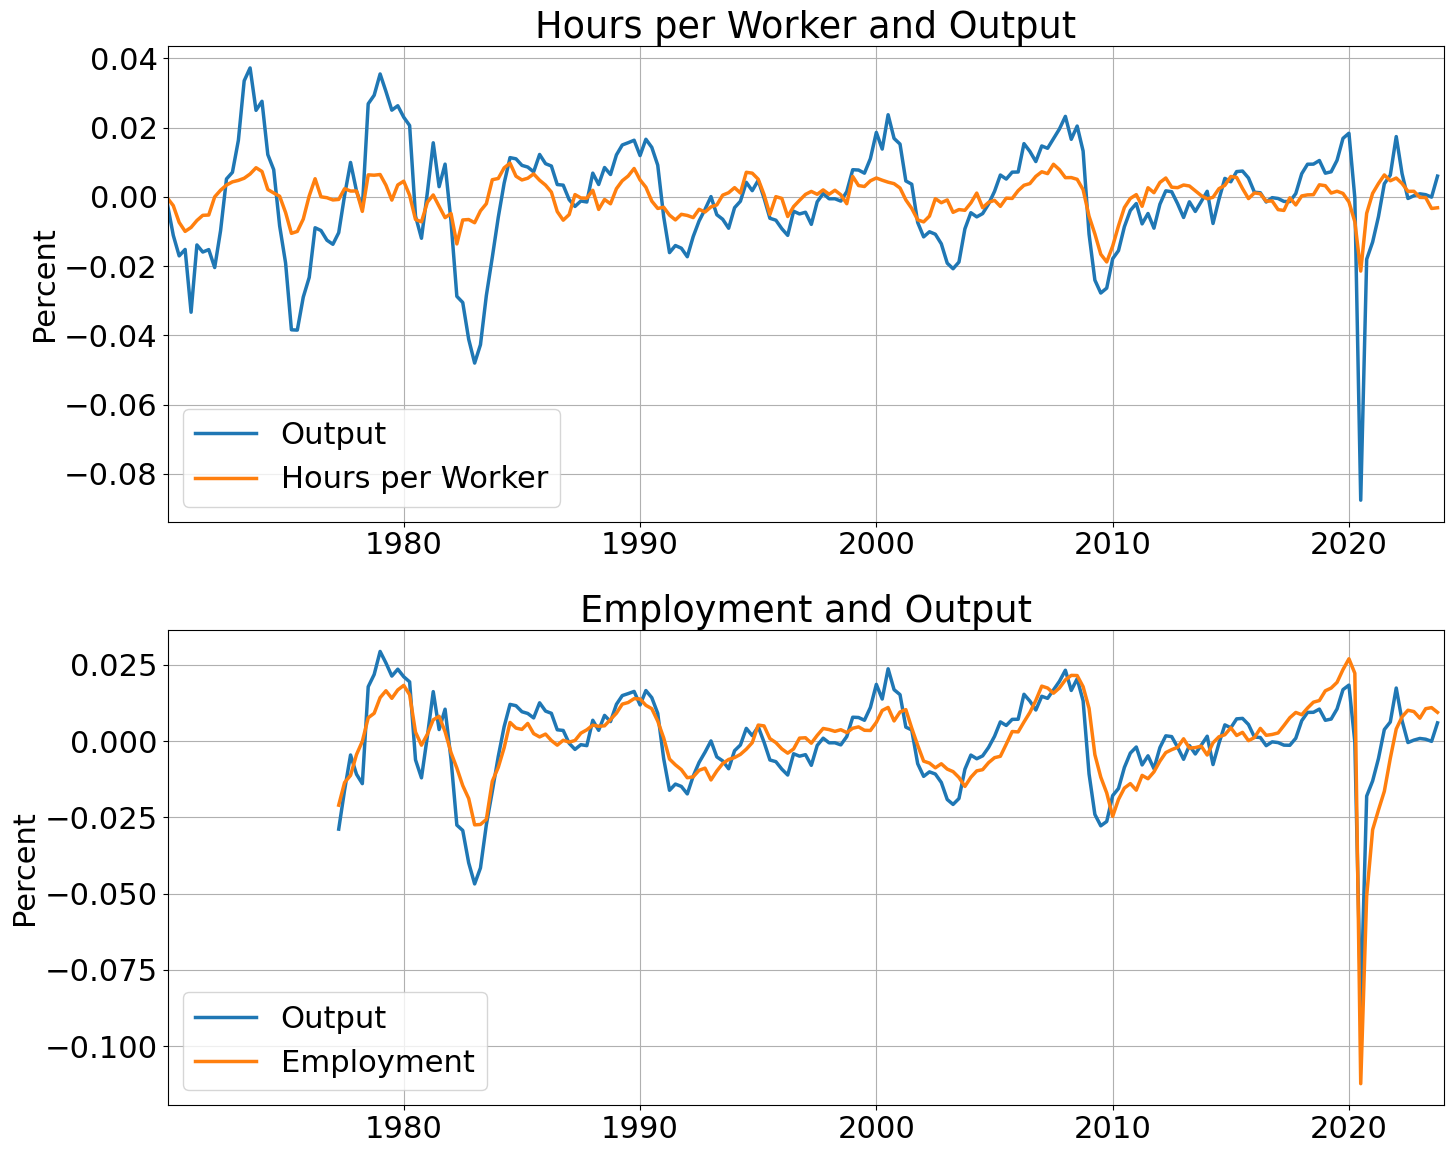

In [22]:
# Drop all NaN values from 'hpworker' and 'employment'
cleaned_hpworker = series['h'].dropna()
cleaned_employment = series['employment'].dropna()

# Drop all NaN values from 'y' (GDP) and ensure it has the same indices as the cleaned data
cleaned_y = series['y'].dropna()

# Step 2: Apply the HP Filter
# Apply the HP filter to the cleaned series
cycle_hpworker, trend_hpworker = sm.tsa.filters.hpfilter(np.log(cleaned_hpworker), lambdahp_1600)
cycle_employment, trend_employment = sm.tsa.filters.hpfilter(np.log(cleaned_employment), lambdahp_1600)

# Apply the HP filter to 'y' for each corresponding cleaned series and align indices
cycle_y_hpworker, trend_y_hpworker = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_hpworker.index)), lambdahp_1600)
cycle_y_employment, trend_y_employment = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_employment.index)), lambdahp_1600)

# Define the x-axis range from 1970 to present and major ticks from 1980
x_range = [pd.to_datetime('1970-01-01'), pd.to_datetime('now')]
start_year = 1980
end_year = pd.to_datetime('now').year
major_ticks = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='10YS')
year_formatter = mdates.DateFormatter('%Y')

# Step 3: Plot the Data
# Creating 2x1 subplots with increased width
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plotting Hours per Worker on the first subplot
axes[0].plot(cleaned_hpworker.index, cycle_y_hpworker, label='Output')
axes[0].plot(cleaned_hpworker.index, cycle_hpworker, label='Hours per Worker')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_title('Hours per Worker and Output')
axes[0].set_xlim(x_range)  # Set the x-axis (time) limits
axes[0].set_xticks(major_ticks)  # Set the major ticks
axes[0].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year

# Plotting Employment on the second subplot
axes[1].plot(cleaned_employment.index, cycle_y_employment, label='Output')
axes[1].plot(cleaned_employment.index, cycle_employment, label='Employment')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('Percent')
axes[1].set_title('Employment and Output')
axes[1].set_xlim(x_range)  # Set the x-axis (time) limits
axes[1].set_xticks(major_ticks)  # Set the major ticks
axes[1].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year

# Adjusts the subplots to fit into the figure area.
plt.tight_layout()

# Show the plot
plt.show()


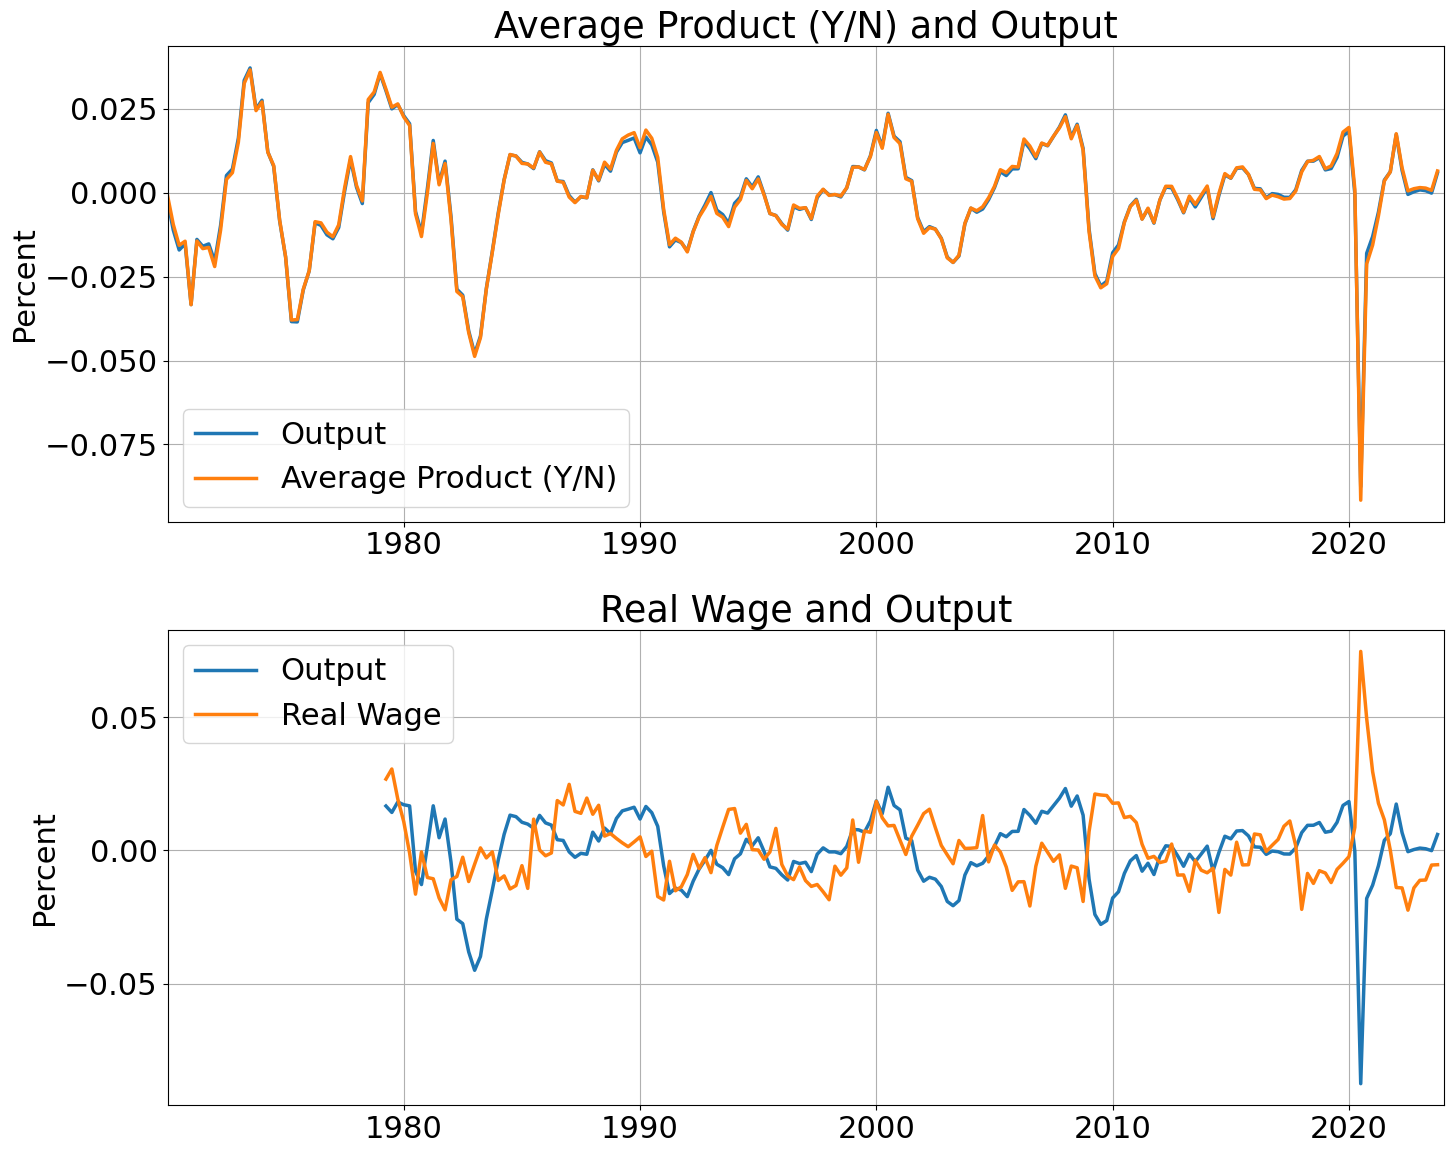

In [23]:
# Drop all NaN values from 'ypop' (Average Product) and 'mrwage' (Real Wage)
cleaned_ypop = series['ypop'].dropna()
cleaned_mrwage = series['mrwage'].dropna()

# Drop all NaN values from 'y' (GDP) and ensure it has the same indices as the cleaned data
cleaned_y = series['y'].dropna()

# Step 2: Apply the HP Filter
# Apply the HP filter to the cleaned series
cycle_ypop, trend_ypop = sm.tsa.filters.hpfilter(np.log(cleaned_ypop), lambdahp_1600)
cycle_mrwage, trend_mrwage = sm.tsa.filters.hpfilter(np.log(cleaned_mrwage), lambdahp_1600)

# Apply the HP filter to 'y' for each corresponding cleaned series and align indices
cycle_y_ypop, trend_y_ypop = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_ypop.index)), lambdahp_1600)
cycle_y_mrwage, trend_y_mrwage = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_mrwage.index)), lambdahp_1600)

# Define the x-axis range from 1970 to present and major ticks from 1980
x_range = [pd.to_datetime('1970-01-01'), pd.to_datetime('now')]
start_year = 1980
end_year = pd.to_datetime('now').year
major_ticks = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='10YS')
year_formatter = mdates.DateFormatter('%Y')

# Step 3: Plot the Data
# Creating 2x1 subplots with increased width
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plotting Average Product on the first subplot
axes[0].plot(cleaned_ypop.index, cycle_y_ypop, label='Output')
axes[0].plot(cleaned_ypop.index, cycle_ypop, label='Average Product (Y/N)')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_title('Average Product (Y/N) and Output')
axes[0].set_xlim(x_range)  # Set the x-axis (time) limits
axes[0].set_xticks(major_ticks)  # Set the major ticks
axes[0].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year

# Plotting Real Wage on the second subplot
axes[1].plot(cleaned_mrwage.index, cycle_y_mrwage, label='Output')
axes[1].plot(cleaned_mrwage.index, cycle_mrwage, label='Real Wage')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('Percent')
axes[1].set_title('Real Wage and Output')
axes[1].set_xlim(x_range)  # Set the x-axis (time) limits
axes[1].set_xticks(major_ticks)  # Set the major ticks
axes[1].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year

# Adjusts the subplots to fit into the figure area.
plt.tight_layout()

# Show the plot
plt.show()

In [171]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Creating dummy data since we don't have the actual datasets.
# In practice, the data would be loaded from the provided datasets indexed by yyyy-mm-dd.



# Function to calculate cross-correlation for given datasets
def calculate_full_cross_correlation_with_y(data, base_date, lags, window=365):
    """
    Calculate the full cross-correlation of time series data with the 'y' series for a range of lags around a specified base date,
    including 'y' with itself.

    Parameters:
    - data: dict of pandas Series with DateTime index, the datasets for 'y', 'c', 'nondur', and 'dur'
    - base_date: str, the base date in 'yyyy-mm-dd' format
    - lags: list of integers, the lags to calculate the cross-correlation for
    - window: int, the number of days around the base_date to consider for correlation

    Returns:
    - DataFrame: a DataFrame with cross-correlations for the specified lags.
    """
    base_date = pd.to_datetime(base_date)
    start_date = base_date - pd.DateOffset(months=window)
    end_date = base_date + pd.DateOffset(months=window)

    y_series = data['y'][start_date:end_date]
    correlation_results = {}

    for key, series in data.items():
        series_window = series[start_date:end_date]
        correlations = []
        for lag in lags:
            shifted_series = series_window.shift(lag)
            valid_index = y_series.index.intersection(shifted_series.index)
            corr = y_series.loc[valid_index].corr(shifted_series.loc[valid_index])
            correlations.append(corr)
        correlation_results[key] = correlations

    correlation_df = pd.DataFrame(correlation_results, index=lags)
    correlation_df = correlation_df.T

    return correlation_df

nx= series['nx'].dropna()

cycle_c, trend_c = sm.tsa.filters.hpfilter(series['c'], lambdahp_1600)
cycle_i, trend_i = sm.tsa.filters.hpfilter(series['i'], lambdahp_1600)
cycle_x, trend_x = sm.tsa.filters.hpfilter(nx, lambdahp_1600)
cycle_m, trend_m = sm.tsa.filters.hpfilter(series['imp'], lambdahp_1600)
cycle_g, trend_g = sm.tsa.filters.hpfilter(series['g'], lambdahp_1600)

data1 = {
    'y': cycle_y,
    'c':cycle_c,
    'nondur': cycle_nondur,
    'dur': cycle_dur,
}

data2 = {
    'y': cycle_y,
    'i': cycle_i,
    'x': cycle_x,
    'm': cycle_m,
    'g': cycle_g,
}


# Specify the base date and the range of lags
base_date = '2010-03-31'
lags = list(range(-3, 4))  # From -3 to +3

# Calculate the full cross-correlation table, including 'y' with itself
table1 = calculate_full_cross_correlation_with_y(data1, base_date, lags)

# Calculate the full cross-correlation table, including 'y' with itself
table2 = calculate_full_cross_correlation_with_y(data2, base_date, lags)



In [186]:
table1

,-3,-2,-1,0,1,2,3,Std Dev (%)
y,0.312832,0.496112,0.715162,1.000000,0.715162,0.496112,0.312832,-3157.528100
c,0.134396,0.282135,0.465371,0.787083,0.510819,0.337280,0.203398,-5311.420461
nondur,0.251937,0.388357,0.468550,0.567491,0.361805,0.214504,0.040758,2134.260688
dur,0.053215,0.195504,0.357684,0.676064,0.705401,0.596092,0.484395,-2259.234347


In [185]:
table2

,-3,-2,-1,0,1,2,3,Std Dev (%)
y,0.312832,0.496112,0.715162,1.000000,0.715162,0.496112,0.312832,-3157.528100
i,0.227541,0.376957,0.580697,0.820641,0.626719,0.481006,0.340225,-7224.146054
x,0.033397,-0.107468,-0.264403,-0.416165,-0.470079,-0.463788,-0.382970,3880.364461
m,0.153066,0.310345,0.537746,0.743447,0.537595,0.395951,0.248986,-11134.711489
g,-0.112477,-0.160842,-0.246232,-0.323807,-0.326820,-0.308956,-0.278798,-10955.910447


In [184]:
import pandas as pd

def calculate_full_cross_correlation_with_y(data, base_date, lags, window=365):
    base_date = pd.to_datetime(base_date)
    start_date = base_date - pd.DateOffset(months=window)
    end_date = base_date + pd.DateOffset(months=window)

    y_series = data['y'][start_date:end_date]
    correlation_results = {}
    std_dev_percentages = {}  # Dictionary to store standard deviation percentages

    for key, series in data.items():
        series_window = series[start_date:end_date]
        std_dev_percent = series_window.std() / series_window.mean() * 100  # Calculate std dev in %
        std_dev_percentages[key] = std_dev_percent
        correlations = []
        for lag in lags:
            shifted_series = series_window.shift(lag)
            valid_index = y_series.index.intersection(shifted_series.index)
            corr = y_series.loc[valid_index].corr(shifted_series.loc[valid_index])
            correlations.append(corr)
        correlation_results[key] = correlations

    correlation_df = pd.DataFrame(correlation_results, index=lags)
    correlation_df = correlation_df.T

    # Add the standard deviation percentages as a new column
    correlation_df['Std Dev (%)'] = correlation_df.index.map(std_dev_percentages)

    return correlation_df

# Example usage with your data1 and data2 dictionaries
table1 = calculate_full_cross_correlation_with_y(data1, base_date, lags)
table2 = calculate_full_cross_correlation_with_y(data2, base_date, lags)
